## clustering: machine learning 
## contents:
### 01 import libraries & data
### 02 clean data/rename columns
### 03 the elbow technique
### 04 k-means clustering

# 01 import libraries & data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\erhil\OneDrive\Career Foundry Program\Immersion Data Analytics Course\A6 - Adv. Analytics & Dashboard Design\Project A6'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'merged3.csv'), index_col = False)

# 02 clean data & rename columns

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,ID,Severity,Distance(mi),City,County,State,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Visibility(mi),Wind_Direction,Precipitation(in),Weather_Condition,Start_Time_no_ext,End_Time_no_ext,Zipcode_no_ext,Airport_Type,Airport_Name,dist_to_weather(mi),project_time_length,const_total_minutes
0,C-2,2,0.433173,Lafayette,Lafayette,LA,US/Central,KLFT,2021-11-12 07:59:00,55.0,3.0,CALM,0.0,Mostly Cloudy,2021-11-12 07:59:00,2021-11-12 08:22:30,70501,large_airport,Lafayette Regional Airport,1.673991,0 days 00:23:30,23.500000
1,C-3,2,0.192266,Denver,Denver,CO,US/Mountain,KBKF,2021-10-12 06:58:00,37.0,10.0,WSW,0.0,Partly Cloudy,2021-10-12 07:17:30,2021-10-12 09:18:55,80224,medium_airport,Buckley Air Force Base,9.058579,0 days 02:01:25,121.416667
2,C-4,4,0.032112,Whittier,Los Angeles,CA,US/Pacific,KFUL,2021-02-10 02:53:00,54.0,9.0,CALM,0.0,Cloudy,2021-02-10 02:46:10,2021-02-17 23:59:00,90605,small_airport,Fullerton Municipal Airport,6.800913,7 days 21:12:50,11352.833333
3,C-5,2,0.996057,Connellsville,Fayette,PA,US/Eastern,KLBE,2020-09-24 15:53:00,73.0,10.0,SSW,0.0,Partly Cloudy,2020-09-24 15:58:00,2020-09-25 21:04:54,15425,medium_airport,Arnold Palmer Regional Airport,21.136875,1 days 05:06:54,1746.900000
4,C-6,2,0.747595,Dallas,Dallas,TX,US/Central,KDAL,2021-06-08 21:53:00,84.0,10.0,SSE,0.0,Partly Cloudy,2021-06-08 21:35:00,2021-06-08 22:04:00,75247,large_airport,Dallas Love Field,2.452856,0 days 00:29:00,29.000000


In [7]:
df.drop(columns = ['ID', 'City', 'County', 'State', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition', 'Start_Time_no_ext', 'End_Time_no_ext', 'Zipcode_no_ext', 'Airport_Type', 'Airport_Name', 'project_time_length'], inplace = True)

In [8]:
df.shape

(5153650, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153650 entries, 0 to 5153649
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Severity             int64  
 1   Distance(mi)         float64
 2   Temperature(F)       float64
 3   Visibility(mi)       float64
 4   Precipitation(in)    float64
 5   dist_to_weather(mi)  float64
 6   const_total_minutes  float64
dtypes: float64(6), int64(1)
memory usage: 275.2 MB


In [10]:
df.head()

,Severity,Distance(mi),Temperature(F),Visibility(mi),Precipitation(in),dist_to_weather(mi),const_total_minutes
0,2,0.433173,55.0,3.0,0.0,1.673991,23.500000
1,2,0.192266,37.0,10.0,0.0,9.058579,121.416667
2,4,0.032112,54.0,9.0,0.0,6.800913,11352.833333
3,2,0.996057,73.0,10.0,0.0,21.136875,1746.900000
4,2,0.747595,84.0,10.0,0.0,2.452856,29.000000


In [11]:
#redo total construction time into hours instead of minutes
df['const_total_hr'] = df['const_total_minutes']/60

In [12]:
#create a new column for the rate of time construction took for job in mi/hr
df['rate_of_construction(mi/hr)'] = df['Distance(mi)']/df['const_total_hr']

In [13]:
df.head()

,Severity,Distance(mi),Temperature(F),Visibility(mi),Precipitation(in),dist_to_weather(mi),const_total_minutes,const_total_hr,rate_of_construction(mi/hr)
0,2,0.433173,55.0,3.0,0.0,1.673991,23.500000,0.391667,1.105974
1,2,0.192266,37.0,10.0,0.0,9.058579,121.416667,2.023611,0.095011
2,4,0.032112,54.0,9.0,0.0,6.800913,11352.833333,189.213889,0.000170
3,2,0.996057,73.0,10.0,0.0,21.136875,1746.900000,29.115000,0.034211
4,2,0.747595,84.0,10.0,0.0,2.452856,29.000000,0.483333,1.546748


In [14]:
#drop the column construction time in minutes (replaced above, changed to 'per hour')
df.drop(columns = ['const_total_minutes'], inplace = True)

In [15]:
df.shape

(5153650, 8)

In [16]:
#standardize the data so that values are comparable and not inadvertently weighted
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [17]:
#fit the standardized data using PCA (to perform dimensionality reduction)
pca = PCA()
pca.fit(df_std)

PCA()

In [18]:
#how much variance is in each of the variables
pca.explained_variance_ratio_

array([0.17811752, 0.14497425, 0.13048244, 0.12935263, 0.12146659,
       0.11096758, 0.10019999, 0.08443899])

Text(0, 0.5, 'Cumulative Explained Variance')

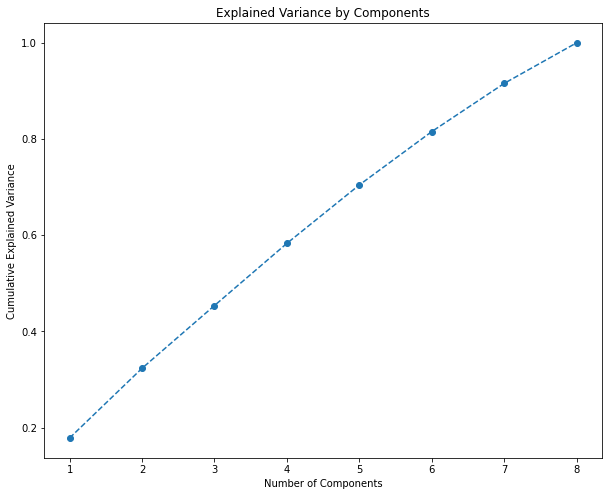

In [20]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 9), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [21]:
#I chose 6 components, as I want to keep at least 80% of the variance.
pca = PCA(n_components = 6)

In [22]:
#fit the model w data with the 6 components
pca.fit(df_std)

PCA(n_components=6)

In [23]:
pca.transform(df_std)

array([[ 0.15689121,  1.63189486,  1.00788972,  0.17881459, -0.50938668,
        -2.10169584],
       [ 0.14142114,  0.54049049, -0.43017593, -0.23711148, -0.93991768,
         0.19928965],
       [-0.29607724,  1.35059892, -1.28474475,  1.86086346,  0.56844262,
         0.56070531],
       ...,
       [-0.5329358 ,  1.33493935, -3.21823199, -4.94116632,  4.91077467,
        -1.50052163],
       [ 0.6621738 , -0.07137925, -0.17613162, -0.35830774, -0.57637857,
         0.36973213],
       [ 0.12099932,  2.14496354,  0.88024995, -0.06776693, -0.80620553,
        -2.07001301]])

# 03 the elbow technique

In [24]:
#defines range of potential clusters
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [25]:
#create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_std).score(df_std) for i in range(len(kmeans))]
score

[-41229200.00000132,
 -36506868.503870346,
 -32986182.310382333,
 -30149850.356675282,
 -27131473.176681764,
 -24514791.123929597,
 -22089630.36383589,
 -20143258.08878404,
 -18585512.019684073]

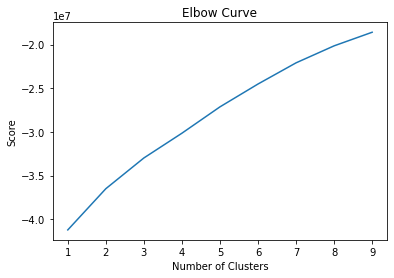

In [26]:
#plot the elbow curve
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()
#elbow curve still has no elbow

In [27]:
#will try again in next script encoding categorical variable(s)